> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper__

# 01 - Cheers!  Stats with Beers


Welcome to the second module in _Computational Mechanics_, your series in computational thinking for undergraduate engineering students. This module explores practical data and statistical analysis with Python.

This first lesson explores how you can answer questions using data combined with practical methods from statistics.

You'll need data. Here is a great data set of
canned craft beers in the US, scraped from the web and cleaned up by
Jean-Nicholas Hould
([@NicholasHould](https://twitter.com/NicholasHould?lang=en) on
Twitter)—who we want to thank for having a permissive license on his
GitHub repository so we can reuse his
[work](https://github.com/nickhould/craft-beers-dataset)!

The data source ([@craftcans](https://twitter.com/craftcans) on Twitter)
doesn't say that the set includes *all* the canned beers brewed in the
country. So you have to asume that the data is a sample and may contain biases.

You'll process the data using **NumPy**—the array library for Python
that you learned about in [Module 1, lesson 2: Getting
Started](../module_01/02-Getting-started).
You'll also learn about a new Python library for data analysis called **Pandas**. 

[`pandas`](http://pandas.pydata.org/) is an open-source library
providing high-performance, easy-to-use data structures and
data-analysis tools.  Even though `pandas` is great for data analysis,
you won't use all its functions in this lesson. But you'll learn more about it later on!

You'll use `pandas` to read the data file (in `csv` format, for
comma-separated values), display it in a table, and extract the
columns that you need—which you'll convert to `numpy` arrays to work with.

Start by importing the two Python libraries that you need.

In [1]:
import pandas as pd
import numpy as np

## Step 1: Read the data file

Below, you'll take a peek into the data file, `beers.csv,` using the
system command `head` (which you can use with a bang (`!`), thanks to IPython).

But first, you will download the data using a Python library for opening
a URL on the Internet. You created a short URL for the data file in the public repository with your course materials.

The cell below should download the data in your current working directory. The next cell shows you the first few lines of the data.

In [2]:
!head "../data/beers.csv"

,abv,ibu,id,name,style,brewery_id,ounces
0,0.05,,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.09,,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,,2262,Sex and Candy,American IPA,177,12.0
5,0.077,,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,,2259,Foreman,American Porter,177,12.0
8,0.055,,2258,Jade,American Pale Ale (APA),177,12.0


You can use `pandas` to read the data from the `csv` file, and save it
into a new variable called `beers`. Let's then check the type of this
new variable—rememeber that you can use the function `type()` to do this.

In [3]:
beers = pd.read_csv('../data/beers.csv')

In [4]:
type(beers)

pandas.core.frame.DataFrame

This is a new data type for us: a `pandas DataFrame`. From the `pandas` documentation: "A `DataFrame`  is a 2-dimensional labeled data structure with columns of potentially different types" [4]. You can think of it as the contens of a spreadsheet, saved into one handy Python variable. If you print it out, you get a nicely laid-out table:

In [5]:
beers

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...,...
2402,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2403,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2404,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2405,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


Inspect the table above. The first column is a numbering scheme for the beers. The other columns contain the following data:

- `abv`: Alcohol-by-volume of the beer.
- `ibu`: International Bittering Units of the beer.
- `id`: Unique identifier of the beer.
- `name`: Name of the beer.
- `style`: Style of the beer.
- `brewery_id`: Unique identifier of the brewery.
- `ounces`: Ounces of beer in the can.

## Step 2: Explore the data

In the field of statistics, [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) has the goal of summarizing the main features of your data, and seeing what the data can tell us without formal modeling or hypothesis-testing. [2]

Let's start by extracting the columns with the `abv` and `ibu` values,
and converting them to numpy arrays. One of the advantages of data
frames in `pandas` is that you can access a column simply using its header, like this:

```python
data_frame['name_of_column']
```

The output of this action is a `pandas Series`. From the documentation: "a `Series` is a 1-dimensional labeled array capable of holding any data type." [4]

Check the type of a column extracted by header:

In [6]:
type(beers['abv'])

pandas.core.series.Series

Of course, you can index and slice a data series like you know how to do
with strings, lists and arrays. Here, you display the first ten elements of the `abv` series:

In [7]:
beers['abv'][:10]

0    0.050
1    0.066
2    0.071
3    0.090
4    0.075
5    0.077
6    0.045
7    0.065
8    0.055
9    0.086
Name: abv, dtype: float64

Inspect the data in the table again: you'll notice that there are `NaN` (not-a-number) elements in both the `abv` and `ibu` columns. Those values mean that there was no data reported for that beer. A typical task when cleaning up data is to deal with these pesky `NaN`s.

Let's extract the two series corresponding to the `abv` and `ibu` columns, clean the data by removing all `NaN` values, and then access the values of each series and assign them to a numpy array.

In [8]:
abv_series = beers['abv']

In [9]:
len(abv_series)

2407

Another advantage of `pandas` is that it has the ability to handle missing data. The  data-frame method `dropna()` returns a new data frame with only the good values of the original: all the null values are thrown out. This is super useful!

In [10]:
abv_clean = abv_series.dropna()

Check out the length of the cleaned-up `abv` data; you'll see that it's shorter than the original. `NaN`s gone!

In [11]:
len(abv_clean)

2348

Remember that a a `pandas` _Series_ consists of a column of values, and
their labels. You can extract the values via the
[`series.values`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.values.html)
attribute, which returns a `numpy.ndarray` (multidimensional array). In
the case of the `abv_clean` series, you get a one-dimensional array. You save it into the variable name `abv`.

In [12]:
abv = abv_clean.values

In [13]:
print(abv)

[0.05  0.066 0.071 ... 0.055 0.055 0.052]


In [14]:
type(abv)

numpy.ndarray

Now, repeat the whole process for the `ibu` column: extract the column
into a series, clean it up removing `NaN`s, extract the series values as
an array, check how many values you lost.

In [15]:
ibu_series = beers['ibu']

len(ibu_series)

2407

In [16]:
ibu_clean = ibu_series.dropna()

ibu = ibu_clean.values

len(ibu)

1405

## Exercise

Write a Python function that calculates the percentage of missing values for a certain data series. Use the function to calculate the percentage of missing values for the `abv` and `ibu` data sets. 

For the original series, before cleaning, remember that you can access the values with `series.values` (e.g., `abv_series.values`).

> __Important__:
> 
> Notice that in the case of the variable `ibu` you are missing almost 42%
> of the values. This is important, because it will affect your analysis.
> When you do descriptive statistics, you will ignore these missing
> values, and having 42% missing will very likely cause bias.

## Step 3: Ready, stats, go!


Now, that you have numpy arrays with clean data, let's see how you can
process them to get some useful information. 

Focusing on the numerical variables `abv` and `ibu`, you'll walk through
some "descriptive statistics," below. In other words, you aim to generate
statistics that summarize the data concisely.

### Maximum and minimum 

The maximum and minimum values of a dataset are helpful as they tell us
the _range_ of your sample: the range gives some indication of the _variability_ in the data.
You can obtain them for your `abv` and `ibu` arrays with the `min()` and `max()` functions from numpy.

**abv**

In [17]:
abv_min = np.min(abv)
abv_max = np.max(abv)

In [18]:
print('The minimum value for abv is: ', abv_min)
print('The maximum value for abv is: ', abv_max)

The minimum value for abv is:  0.001
The maximum value for abv is:  0.128


**ibu**

In [19]:
ibu_min = np.min(ibu)
ibu_max = np.max(ibu)

In [20]:
print('The minimum value for ibu is: ', ibu_min)
print('The maximum value for ibu is: ', ibu_max)

The minimum value for ibu is:  4.0
The maximum value for ibu is:  138.0


### Mean value

The **mean** value is one of the main measures to describe the central
tendency of the data: an indication of where's the "center" of the data.
If you have a sample of $N$ values, $x_i$, the mean, $\bar{x}$, is calculated by:

$\bar{x} = \frac{1}{N}\sum_{i} x_i$

In words, that is the sum of the data values divided by the number of values, $N$. 

You've already learned how to write a function to compute the mean in
[Module 1 Lesson 5](http://go.gwu.edu/engcomp1lesson5), but you also
learned that numpy has a built-in `mean()` function. You'll use this to
get the mean of the `abv` and `ibu` values.

In [21]:
abv_mean = np.mean(abv)
ibu_mean = np.mean(ibu)

Next, you'll print these two variables, but you'll use some fancy new way of printing with Python's string formatter, `string.format()`. There's a sweet site dedicated to Python's string formatter, called [PyFormat](https://pyformat.info), where you can learn lots of tricks!

The basic trick is to use curly brackets `{}` as placeholder for a variable value that you want to print in the middle of a string (say, a sentence that explains what you are printing), and to pass the variable name as argument to `.format()`, preceded by the string.

Let's try something out…

In [22]:
print('The mean value for abv is {} and for ibu {}'.format(abv_mean, ibu_mean))

The mean value for abv is 0.059773424190800666 and for ibu 42.71316725978647


Ugh! That doesn't look very good, does it? Here's where Python's string
formatting gets fancy. You can print fewer decimal digits, so the
sentence is more readable. For example, if you want to have four decimal
digits, specify it this way:

In [23]:
print('The mean value for abv is {:.4f} and for ibu {:.4f}'.format(abv_mean, ibu_mean))

The mean value for abv is 0.0598 and for ibu 42.7132


Inside the curly brackets—the placeholders for the values you want to print—the `f` is for `float` and the `.4` is for four digits after the decimal dot. The colon here marks the beginning of the format specification (as there are options that can be passed before). There are so many tricks to Python's string formatter that you'll usually look up just what you need.
Another useful resource for string formatting is the [Python String Format Cookbook](https://mkaz.blog/code/python-string-format-cookbook/). Check it out!

### Variance and standard deviation

While the mean indicates where's the center of your data, the
**variance** and **standard deviation** describe the *spread* or
variability of the data. You already mentioned that the _range_
(difference between largest and smallest data values) is also an
indication of variability. But the standard deviation is the most common
measure of variability.

[Prof. Kristin Sainani](https://profiles.stanford.edu/kristin-sainani),
of Stanford University, presents this in her online course on
[Statistics in
Medicine](https://lagunita.stanford.edu/courses/Medicine/MedStats-SP/SelfPaced/about).
In her lecture "Describing Quantitative Data: What is the variability in
the data?", available [on YouTube](https://youtu.be/hlFeEQF5tDc), she
asks: _What if someone were to ask you to devise a statistic that gives
the avarage distance from the mean?_ Think about this a little bit.

The distance from the mean, for any data value, is $x_i - \bar{x}$. So
what is the average of the distances from the mean? If you try to simply
compute the average of all the values $x_i - \bar{x}$, some of which are
negative, you'll just get zero! It doesn't work.

Since the problem is the negative distances from the mean, you might
suggest using absolute values. But this is just mathematically
inconvenient. Another way to get rid of negative values is to take the
squares. And that's how you get to the expression for the _variance_: it is the average of the squares of the deviations from the mean. For a set of $N$ values,

$\text{var} = \frac{1}{N}\sum_{i} (x_i - \bar{x})^2$


The variance itself is hard to interpret. The problem with it is that the units are strange (they are the square of the original units). The **standard deviation**, the square root of the variance, is more meaningful because it has the same units as the original variable. Often, the symbol $\sigma$ is used for it:

$\sigma = \sqrt{\text{var}} = \sqrt{\frac{1}{N}\sum_{i} (x_i - \bar{x})^2}$

### Sample vs. population

The above definitions are used when $N$ (the number of values)
represents the entire population. But if you have a _sample_ of that
population, the formulas have to be adjusted: instead of dividing by $N$
you divide by $N-1$. This is important, especially when you work with
real data since usually you have samples of populations. 

The **standard deviation** of a sample is denoted by $s$, and the formula is:

$s = \sqrt{\frac{1}{N-1}\sum_{i} (x_i - \bar{x})^2}$

Why? This gets a little technical, but the reason is that if you have a
_sample_ of the population, you don't know the _real_ value of the mean,
and $\bar{x}$ is actually an _estimate_ of the mean. That's why you'll
often find the symbol $\mu$ used to denote the population mean, and
distinguish it with the sample mean, $\bar{x}$. Using $\bar{x}$ to
compute the standard deviation introduces a small bias: $\bar{x}$ is
computed _from the sample values_, and the data are on average
(slightly) closer to $\bar{x}$ than the population is to $\mu$. Dividing
by $N-1$ instead of $N$ corrects this bias!

Prof. Sainani explains it by saying that you lost one degree of freedom
when you estimated the mean using $\bar{x}$.  For example, say you have
100 people and I give you their mean age, and the actual age for 99
people from the sample: you'll be able to calculate the age of that
100th person. Once you calculated the mean, you only have 99 degrees of
freedom left because that 100th person's age is fixed. 

Below is a graphical distinction between the _sample_ and the _population_ from [@allison_horst on twitter](https://twitter.com/allison_horst)

![Sample vs Population from @allison_horst](https://pbs.twimg.com/media/EOM8s3fVUAAglHu?format=jpg&name=small)

### Let's code!

Now that you have the math sorted out, you can program functions to
compute the variance and the standard deviation. In your case, you are
working with samples of the population of craft beers, so you need to use
the formulas with $N-1$ in the denominator.

In [24]:
def sample_var(array):
    """ Calculates the variance of an array that contains values of a sample of a 
    population. 
    
    Arguments
    ---------
    array : array, contains sample of values. 
    
    Returns
    -------
    var   : float, variance of the array .
    """
    
    sum_sqr = 0 
    mean = np.mean(array)
    
    for element in array:
        sum_sqr += (element - mean)**2
    
    N = len(array)
    var = sum_sqr / (N - 1)
    
    return var
    

Notice that you used `np.mean()` in your function: do you think you can make this function even more Pythonic? 

*Hint:* Yes!, you totally can.

##### Exercise:

Re-write the function `sample_var()` using `np.sum()` to replace the `for`-loop. Name the function `var_pythonic`.

In [25]:
def var_pythonic(array):
    """ Calculates the variance of an array that contains values of a sample of a 
    population. 
    
    Arguments
    ---------
    array : array, contains sample of values. 
    
    Returns
    -------
    var   : float, variance of the array .
    """
    
    return var

You have the sample variance, so you take its square root to get the
standard deviation. You can make it a function, even though it's just
one line of Python, to make your code more readable:

In [26]:
def sample_std(array):
    """ Computes the standard deviation of an array that contains values
    of a sample of a population.
    
    Arguments
    ---------
    array : array, contains sample of values. 
    
    Returns
    -------
    std   : float, standard deviation of the array.
    """
    
    std = np.sqrt(sample_var(array))
    
    return std

Let's call your brand new functions and assign the output values to new variables:

In [27]:
abv_std = sample_std(abv)
ibu_std = sample_std(ibu)

If you print these values using the string formatter, only printing 4
decimal digits, you can display your descriptive statistics in a pleasant, human-readable way.

In [28]:
print('The standard deviation for abv is {:.4f} and for ibu {:.4f}'.format(abv_std, ibu_std))

The standard deviation for abv is 0.0135 and for ibu 25.9541


These numbers tell us that the `abv` values are quite concentrated
around the mean value, while the `ibu` values are quite spread out from
their mean. How could you check these descriptions of the data? A good way of doing so is using graphics: various types of plots can tell us things about the data. 

You'll learn about _histograms_ in this lesson, and in the following
lesson you'll explore _box plots_.

## Step 4: Distribution plots 

Every time that you work with data, visualizing it is very useful.
Visualizations give us a better idea of how your data behaves. One way of
visualizing data is with a frequency-distribution plot known as
**histogram**: a graphical representation of how the data is
distributed. To make a histogram, first you need to "bin" the range of
values (divide the range into intervals) and then you count how many data values fall into each interval. The intervals are usually consecutive (not always), of equal size and non-overlapping. 

Thanks to Python and Matplotlib, making histograms is easy. You
recommend that you always read the documentation, in this case about
[histograms](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html).
You'll show you here an example using the `hist()` function from `pyplot`, but this is just a starting point. 

Let's first load the **Matplotlib** module called `pyplot`, for making
2D plots. Remember that to get the plots inside the notebook, you use a special "magic" command, `%matplotlib inline`:

In [29]:
from matplotlib import pyplot
%matplotlib inline

#Import rcParams to set font styles
from matplotlib import rcParams

(array([  1.,   0.,  38., 699., 857., 486., 159., 104.,   1.,   3.]),
 array([0.001 , 0.0137, 0.0264, 0.0391, 0.0518, 0.0645, 0.0772, 0.0899,
        0.1026, 0.1153, 0.128 ]),
 <BarContainer object of 10 artists>)

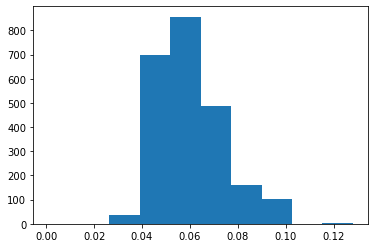

In [30]:
pyplot.hist(abv)

Now, you have a line plot, but if you see this plot without any
information you would not be able to figure out what kind of data it is!
You need labels on the axes, a title and why not a better color, font and size of the ticks. 
**Publication quality** plots should always be your standard for plotting. 
How you present your data will allow others (and probably you in the future) to better understand your work. 

You can customize the style of your plots using parameters for the lines,
text, font and other plot options. You set some style options that apply
for all the plots in the current session with
[`plt.rc()`](https://matplotlib.org/api/_as_gen/matplotlib.plt.rc.html)
Here, you'll make the font of a specific type and size (sans-serif and 18
points). You can also customize other parameters like line width, color,
and so on (check out the documentation).

In [31]:
#Set font style and size 
rcParams['font.family'] = 'sans'
rcParams['lines.linewidth'] = 3
rcParams['font.size'] = 18

You'll redo the same plot, but now you'll add a few things to make it
prettier and **publication quality**. You'll add a title, label the axes
and, show a background grid. Study the commands below and look at the
result!

> __Note__: 
> Setting `rcParams` is a great way to control detailed plots, but there
> are also dozens of [matplotlib
> styles](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
> that look great. My recommendation is to keep axis/legend fonts >18 pt and
> tick labels >16pt. The [fivethirtyeight style
> sheet](https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html)
> does a nice job presenting readable plots. Set the style using:
> ```python
> plt.style.use('fivethirtyeight')
> ```
> I'll use this in most of the notebooks.

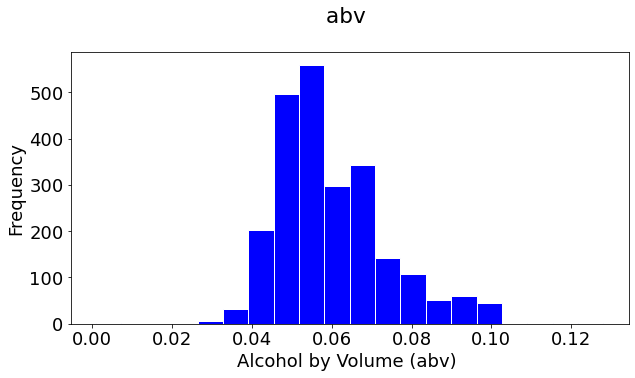

In [32]:
#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.hist(abv, bins=20, color='b', histtype='bar', edgecolor='white') 
#The \n is to leave a blank line between the title and the plot
pyplot.title('abv \n')
pyplot.xlabel('Alcohol by Volume (abv) ')
pyplot.ylabel('Frequency');

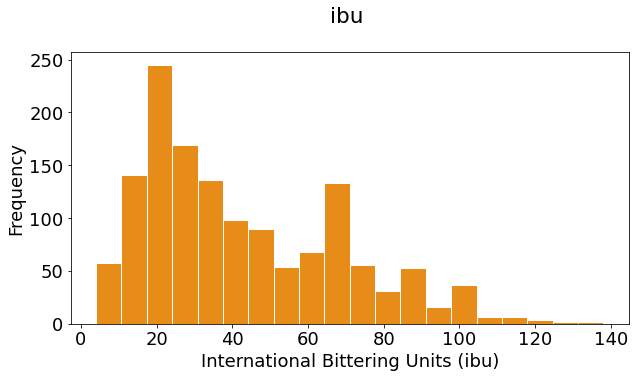

In [33]:
#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.hist(ibu, bins=20, color=(0.9, 0.5, 0, 0.9), histtype='bar', edgecolor='white') 
#The \n is to leave a blanck line between the title and the plot
pyplot.title('ibu \n')
pyplot.xlabel('International Bittering Units (ibu)')
pyplot.ylabel('Frequency');

In the previous two plots set the colors in two ways:

1. A string 'b', which specifies blue. You could also choose from: a string representation 
one of 

    {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'} = 
    {**b**lue, **g**reen, **r**ed, **c**yan, **m**agenta, **y**ellow, blac**k**, **w**hite}
    
2. A RGB or RGBA (red, green, blue, alpha) tuple of float values in [0, 1] (e.g., (0.1, 0.2, 0.5) or (0.1, 0.2, 0.5, 0.3));

Check out the other formatting options use can use in [Matplotlib colors](https://matplotlib.org/3.1.1/tutorials/colors/colors.html) and [Matplotlib hist command](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)

## Exploratory exercise:

Play around with the plots, change the values of the bins, colors, etc.

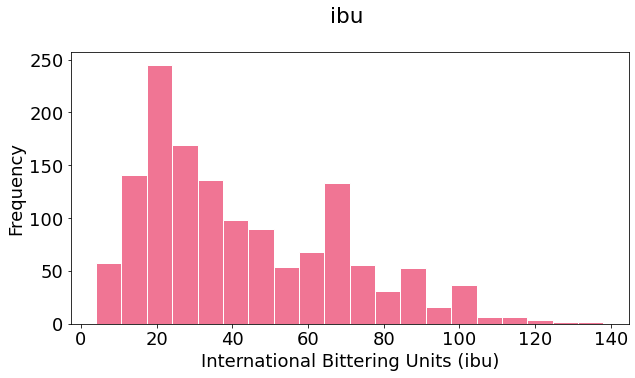

In [34]:
#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.hist(ibu, bins=20, color=(0.9, 0.1, 0.3, 0.6), histtype='bar', edgecolor='white') 
#pyplot.hist(ibu, bins=20, color=(0.9, 0.8, 0, 0.1), histtype='bar', edgecolor='white') 
#pyplot.hist(ibu, bins=20, color=(0.1, 0.1, 0, 0.1), histtype='bar', edgecolor='white') 
#The \n is to leave a blanck line between the title and the plot
pyplot.title('ibu \n')
pyplot.xlabel('International Bittering Units (ibu)')
pyplot.ylabel('Frequency');

### Comparing with a normal distribution

A **normal** (or Gaussian) distribution is a special type of
distrubution that behaves as shown in the figure: 68% of the values are
within one standard deviation $\sigma$ from the mean; 95% lie within
$2\sigma$; and at a distance of $\pm3\sigma$ from the mean, you cover
99.7% of the values. This fact is known as the $3$-$\sigma$ rule, or
68-95-99.7 (empirical) rule.

<img src="../images/std_bell_curve.png" style="width: 800px;"/> 

####  Standard deviation and coverage in a normal distribution. Modified figure based on original from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Standard_deviation_diagram.svg), the free media repository.


Notice that your histograms don't follow the shape of a normal
distribution, known as *Bell Curve*. Our histograms are not centered in
the mean value, and they are not symetric with respect to it. They are
what is call **skewed** to the right (yes, to the _right_). A right (or positive) skewed distribution  looks like it's been pushed to the left: the right tail is longer and most of the values are concentrated on the left of the figure. Imagine that "right-skewed" means that a force from the right pushes on the curve.

## Discussion point

* How do you think that skewness will affect the percentages of coverage by standard deviation compared to the Bell Curve?

_skewness creates a bias towards one or another direction from the mean.
You can't assume the mean and mode are the same value_

* Can you calculate those percentages? 

_with logical operators! `x[x<mean_x]/len(x)*100`

## Exercise

You can calculate skewness and standard deviation in a few lines of
Python. But before doing that, you want you to explain in your own words
how the following piece of code works. 

*Hints:* 

1. Check what the logical operation `np.logical_and(1<x, x<4)` returns.
2. Check what happens if you sum booleans. For example, `True + True`, `True + False` and so on.

Now, using the same idea, you will calculate the number of elements in each interval of width $(1\sigma, 2\sigma, 3\sigma)$, and get the corresponding percentage. 

Since you want to compute this for both of your variables, `abv` and
`ibu`, you'll write a function to do so. Study carefully the code below. Better yet, explain it to your neighbor.

In [35]:
print('ibu 1sigma')
print(np.sum(np.logical_and(ibu_clean<ibu_mean+ibu_std,ibu_clean>ibu_mean-ibu_std)/len(ibu_clean)))
print('ibu 2sigma')
print(np.sum(np.logical_and(ibu_clean<ibu_mean+2*ibu_std,ibu_clean>ibu_mean-2*ibu_std)/len(ibu_clean)))
print('ibu 3sigma')
print(np.sum(np.logical_and(ibu_clean<ibu_mean+3*ibu_std,ibu_clean>ibu_mean-3*ibu_std)/len(ibu_clean)))

ibu 1sigma
0.6811387900355872
ibu 2sigma
0.9565836298932386
ibu 3sigma
0.9971530249110322


In [36]:
print('abv 1sigma')
print(np.sum(np.logical_and(abv_clean<abv_mean+abv_std,abv_clean>abv_mean-abv_std)/len(abv_clean)))
print('abv 2sigma')
print(np.sum(np.logical_and(abv_clean<abv_mean+2*abv_std,abv_clean>abv_mean-2*abv_std)/len(abv_clean)))
print('abv 3sigma')
print(np.sum(np.logical_and(abv_clean<abv_mean+3*abv_std,abv_clean>abv_mean-3*abv_std)/len(abv_clean)))

abv 1sigma
0.7406303236797274
abv 2sigma
0.9433560477001701
abv 3sigma
0.9978705281090289


In [37]:
def std_percentages(x, x_mean, x_std):
    """ Computes the percentage of coverage at 1std, 2std and 3std from the
    mean value of a certain variable x.
    
    Arguments
    ---------
    x      : array, data you want to compute on. 
    x_mean : float, mean value of x array.
    x_std  : float, standard deviation of x array.
    
    Returns
    -------
    
    per_std_1 : float, percentage of values within 1 standard deviation.
    per_std_2 : float, percentage of values within 2 standard deviations.
    per_std_3 : float, percentage of values within 3 standard deviations.    
    """
    
    std_1 = x_std
    std_2 = 2 * x_std
    std_3 = 3 * x_std
    
    elem_std_1 = np.logical_and((x_mean - std_1) < x, x < (x_mean + std_1)).sum()
    per_std_1 = elem_std_1 * 100 / len(x) 
    
    elem_std_2 = np.logical_and((x_mean - std_2) < x, x < (x_mean + std_2)).sum()
    per_std_2 = elem_std_2 * 100 / len(x) 
    
    elem_std_3 = np.logical_and((x_mean - std_3) < x, x < (x_mean + std_3)).sum()
    per_std_3 = elem_std_3 * 100 / len(x) 
    
    return per_std_1, per_std_2, per_std_3
    

Compute the percentages next. Notice that the function above returns
three values. If you want to assign each value to a different variable,
you need to follow a specific syntax. In your example this would be:

**abv**

In [38]:
abv_std1_per, abv_std2_per, abv_std3_per = std_percentages(abv, abv_mean, abv_std)

Pretty-print the values of your variables so you can inspect them:

In [39]:
print('The percentage of coverage at 1 std of the abv_mean is : {:.2f} %'.format(abv_std1_per))
print('The percentage of coverage at 2 std of the abv_mean is : {:.2f} %'.format(abv_std2_per))
print('The percentage of coverage at 3 std of the abv_mean is : {:.2f} %'.format(abv_std3_per))

The percentage of coverage at 1 std of the abv_mean is : 74.06 %
The percentage of coverage at 2 std of the abv_mean is : 94.34 %
The percentage of coverage at 3 std of the abv_mean is : 99.79 %


**ibu**

In [40]:
ibu_std1_per, ibu_std2_per, ibu_std3_per = std_percentages(ibu, ibu_mean, ibu_std)

In [41]:
print('The percentage of coverage at 1 std of the ibu_mean is : {:.2f} %'.format(ibu_std1_per))
print('The percentage of coverage at 2 std of the ibu_mean is : {:.2f} %'.format(ibu_std2_per))
print('The percentage of coverage at 3 std of the ibu_mean is : {:.2f} %'.format(ibu_std3_per))

The percentage of coverage at 1 std of the ibu_mean is : 68.11 %
The percentage of coverage at 2 std of the ibu_mean is : 95.66 %
The percentage of coverage at 3 std of the ibu_mean is : 99.72 %


Notice that in both cases the percentages are not that far from the values for normal distribution (68%, 95%, 99.7%), especially for $2\sigma$ and $3\sigma$. So usually you can use these values as a rule of thumb.

## What you've learned

* Read data from a `csv` file using `pandas`.
* The concepts of Data Frame and Series in `pandas`.
* Clean null (NaN) values from a Series using `pandas`.
* Convert a `panda`s Series into a `numpy` array.
* Compute maximum and minimum, and range.
* Revise concept of mean value.
* Compute the variance and standard deviation.
* Use the mean and standard deviation to understand how the data is distributed.
* Plot frequency distribution diagrams (histograms).
* Normal distribution and 3-sigma rule.

## References

1. [Craft beer datatset](https://github.com/nickhould/craft-beers-dataset) by Jean-Nicholas Hould.
2. [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis), Wikipedia article.
3. _Think Python: How to Think Like a Computer Scientist_ (2012). Allen Downey. Green Tea Press.  [PDF available](http://greenteapress.com/thinkpython/thinkpython.pdf)
4. [Intro to data Structures](https://pandas.pydata.org/pandas-docs/stable/dsintro.html), `pandas` documentation.
5. _Think Stats: Probability and Statistics for Programmers_ version 1.6.0 (2011). Allen Downey. Green Tea Press.  [PDF available](http://greenteapress.com/thinkstats/thinkstats.pdf)

### Recommended viewing

From ["Statistics in
Medicine,"](https://lagunita.stanford.edu/courses/Medicine/MedStats-SP/SelfPaced/about),
a free course in Stanford Online by Prof. Kristin Sainani, highly
recommended three lectures: 
* [Describing Quantitative Data: Where is the center?](https://youtu.be/tQ5slNYRcC4)
* [Describing Quantitative Data: What is the variability in the data?](https://youtu.be/hlFeEQF5tDc)
* [Variability in the data, continued: examples, bell curve](https://youtu.be/qeG0uNI3DBQ)